TC University of Adelaide | kevin.ferreira@student.adelaide.edu.au | a1882774  
**Computer vision 2022 Assignment 3: Deep Learning for Perception Tasks**

In [1]:
!jupyter nbconvert --to pdf --no-input --TagRemovePreprocessor.remove_cell_tags 'remove-cell' Assignment3.ipynb

[NbConvertApp] WARNING | pattern 'Assignment3.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
   

In [2]:
import numpy as np # This is for mathematical operations

# this is used in plotting 
import matplotlib.pyplot as plt 
import time
import pylab as pl
from IPython import display

%matplotlib inline

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

# Question 1: A simple classifier, 20 marks (70%)

In this question, we will work with the Fashion-MNIST dataset and a neural network implemented using the PyTorch libraries to train a neural network. The dataset consists of 60,000 training images and 10,000 test images of clothing items, labeled with integers from 0 to 9 representing different classes of clothing:  
- class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', Sandal', 'Shirt', 'Sneaker', 'Bag', 'Boot']).  

We will use this dataset to train a neural network to classify clothing items into their respective classes.

First, we start by importing the necessary libraries and dataset.

In [3]:
#### Tutorial Code
####PyTorch has two primitives to work with data: torch.utils.data.DataLoader and torch.utils.data.Dataset. 
#####Dataset stores samples and their corresponding labels, and DataLoader wraps an iterable around the Dataset.
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt

# Download training data from open datasets. 
##Every TorchVision Dataset includes two arguments: 
##transform and target_transform to modify the samples and labels respectively.

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print("***** training_data *****")
print(training_data, "\n")
print("******* test_data *******")
print(test_data)

***** training_data *****
Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor() 

******* test_data *******
Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


We pass the Dataset as an argument to DataLoader. This wraps an iterable over our dataset and supports automatic batching, sampling, shuffling, and multiprocess data loading. Here we define a batch size of 64, i.e. each element in the dataloader iterable will return a batch of 64 features and labels.

In [4]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    break

Shape of X [N, C, H, W]:  torch.Size([64, 1, 28, 28])
Shape of y:  torch.Size([64]) torch.int64


**Q1.1 (1 point)** Now let's extract 3 images of three different types of clothes. To do this we will browse the images and their corresponding labels and display the three images corresponding to the first three labels which are different.

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1, 4, 8,
        4, 3, 0, 2, 4, 4, 5, 3, 6, 6, 0, 8, 5, 2, 1, 6, 6, 7, 9, 5, 9, 2, 7, 3,
        0, 3, 3, 3, 7, 2, 2, 6, 6, 8, 3, 3, 5, 0, 5, 5])
tensor([0, 2, 0, 0, 4, 1, 3, 1, 6, 3, 1, 4, 4, 6, 1, 9, 1, 3, 5, 7, 9, 7, 1, 7,
        9, 9, 9, 3, 2, 9, 3, 6, 4, 1, 1, 8, 8, 0, 1, 1, 6, 8, 1, 9, 7, 8, 8, 9,
        6, 6, 3, 1, 5, 4, 6, 7, 5, 5, 9, 2, 2, 2, 7, 6])
tensor([4, 1, 8, 7, 7, 5, 4, 2, 9, 1, 7, 4, 6, 9, 7, 1, 8, 7, 1, 2, 8, 0, 9, 1,
        8, 7, 0, 5, 8, 6, 7, 2, 0, 8, 7, 1, 6, 2, 1, 9, 6, 0, 1, 0, 5, 5, 1, 7,
        0, 5, 8, 4, 0, 4, 0, 6, 6, 4, 0, 0, 4, 7, 3, 0])
tensor([5, 8, 4, 1, 1, 2, 9, 2, 8, 5, 0, 6, 3, 4, 6, 0, 9, 1, 7, 3, 8, 5, 8, 3,
        8, 5, 2, 0, 8, 7, 0, 3, 5, 0, 6, 5, 2, 7, 5, 2, 6, 8, 2, 6, 8, 0, 4, 4,
        4, 4, 4, 1, 5, 6, 5, 3, 3, 7, 3, 3, 6, 2, 8, 4])
tensor([6, 5, 9, 3, 2, 3, 2, 4, 4, 8, 2, 5, 3, 0, 7, 2, 0, 2, 5, 7, 2, 3, 1, 7,
        6, 2, 9, 1, 9, 1, 1, 8, 7, 8, 4, 2, 6, 6, 7,

tensor([5, 6, 2, 9, 4, 0, 1, 0, 2, 2, 9, 1, 3, 7, 6, 4, 5, 9, 7, 4, 5, 6, 2, 8,
        3, 3, 5, 0, 5, 7, 4, 7, 4, 9, 6, 6, 6, 7, 1, 0, 1, 8, 0, 8, 2, 7, 3, 0,
        3, 5, 5, 2, 5, 4, 5, 8, 2, 3, 4, 9, 6, 4, 5, 4])
tensor([6, 5, 8, 3, 3, 4, 8, 4, 4, 2, 8, 6, 7, 7, 8, 6, 5, 4, 7, 7, 5, 3, 1, 4,
        4, 8, 5, 0, 3, 5, 0, 9, 1, 4, 9, 9, 1, 5, 4, 5, 9, 8, 3, 4, 1, 8, 1, 3,
        7, 4, 9, 5, 2, 5, 4, 5, 9, 9, 8, 9, 9, 1, 4, 9])
tensor([6, 5, 2, 2, 1, 8, 7, 7, 4, 1, 7, 7, 2, 3, 5, 2, 3, 5, 8, 6, 7, 4, 0, 4,
        2, 3, 2, 7, 9, 8, 1, 5, 1, 8, 0, 2, 3, 5, 8, 4, 6, 0, 8, 3, 4, 9, 7, 1,
        7, 9, 8, 6, 7, 4, 5, 0, 9, 1, 2, 6, 2, 0, 8, 3])
tensor([2, 3, 3, 7, 4, 4, 2, 7, 5, 5, 7, 6, 1, 9, 4, 0, 4, 7, 1, 9, 4, 3, 6, 1,
        7, 2, 6, 1, 4, 9, 0, 6, 8, 2, 6, 8, 6, 3, 5, 6, 1, 7, 5, 9, 3, 1, 1, 9,
        6, 7, 5, 9, 1, 4, 2, 8, 4, 5, 1, 1, 1, 4, 7, 2])
tensor([9, 9, 7, 1, 9, 4, 3, 0, 8, 1, 0, 8, 6, 1, 2, 8, 3, 4, 5, 0, 6, 4, 8, 5,
        0, 6, 4, 4, 6, 3, 3, 6, 1, 5, 9, 3, 9, 4, 8,

tensor([6, 9, 5, 0, 1, 7, 9, 7, 2, 6, 4, 5, 9, 1, 9, 3, 8, 5, 2, 4, 9, 3, 4, 9,
        0, 9, 1, 5, 3, 8, 8, 1, 6, 7, 9, 5, 4, 3, 0, 7, 0, 7, 1, 8, 1, 0, 9, 8,
        5, 2, 9, 7, 0, 1, 2, 4, 9, 4, 9, 5, 5, 1, 5, 4])
tensor([2, 2, 1, 7, 2, 7, 3, 3, 8, 9, 9, 7, 6, 6, 8, 7, 5, 0, 6, 4, 2, 1, 9, 7,
        4, 8, 2, 5, 7, 9, 6, 5, 2, 2, 3, 4, 4, 1, 5, 9, 2, 2, 1, 7, 0, 4, 7, 2,
        5, 3, 6, 4, 5, 2, 8, 9, 1, 2, 1, 2, 5, 8, 2, 5])
tensor([3, 8, 5, 9, 7, 1, 0, 8, 8, 6, 1, 1, 4, 9, 1, 3, 5, 5, 4, 5, 7, 6, 4, 6,
        5, 9, 2, 6, 3, 4, 6, 6, 1, 8, 3, 3, 9, 3, 9, 1, 7, 4, 5, 6, 0, 9, 1, 1,
        2, 2, 1, 7, 8, 3, 8, 3, 3, 0, 6, 9, 8, 6, 1, 7])
tensor([2, 8, 3, 8, 1, 5, 0, 6, 5, 6, 1, 7, 5, 8, 8, 9, 7, 7, 9, 5, 9, 4, 5, 3,
        9, 0, 5, 8, 1, 0, 8, 6, 7, 5, 0, 4, 0, 9, 0, 6, 6, 4, 1, 6, 1, 5, 0, 4,
        4, 2, 2, 5, 5, 9, 3, 4, 4, 7, 4, 2, 7, 7, 1, 8])
tensor([7, 6, 4, 3, 1, 7, 6, 2, 2, 4, 1, 5, 7, 1, 3, 6, 1, 7, 1, 3, 7, 0, 3, 7,
        0, 7, 5, 1, 9, 1, 1, 0, 7, 8, 5, 9, 9, 4, 0,

tensor([7, 0, 7, 4, 9, 4, 2, 9, 9, 9, 6, 5, 2, 3, 5, 6, 5, 1, 9, 6, 1, 5, 6, 9,
        3, 5, 3, 5, 3, 2, 7, 0, 9, 1, 1, 2, 1, 3, 6, 4, 8, 4, 1, 3, 2, 6, 2, 0,
        9, 5, 8, 6, 5, 5, 6, 8, 0, 8, 3, 9, 6, 9, 8, 3])
tensor([2, 5, 8, 3, 9, 0, 9, 9, 8, 1, 3, 8, 4, 9, 9, 0, 3, 0, 0, 6, 7, 8, 6, 6,
        4, 6, 3, 9, 0, 4, 6, 7, 2, 5, 6, 2, 9, 7, 0, 2, 2, 3, 8, 4, 7, 6, 8, 7,
        3, 6, 2, 1, 3, 7, 0, 4, 7, 7, 5, 9, 4, 9, 4, 7])
tensor([1, 5, 4, 6, 2, 7, 1, 6, 1, 4, 5, 5, 8, 2, 9, 9, 9, 4, 7, 7, 5, 2, 0, 9,
        1, 5, 0, 4, 9, 6, 8, 8, 3, 3, 6, 2, 6, 4, 5, 8, 0, 5, 2, 3, 4, 9, 2, 8,
        5, 7, 4, 4, 0, 5, 3, 5, 3, 5, 3, 0, 0, 4, 5, 0])
tensor([1, 7, 6, 7, 9, 0, 8, 1, 4, 9, 0, 6, 9, 8, 8, 9, 2, 9, 3, 4, 2, 2, 5, 9,
        9, 4, 1, 9, 4, 4, 5, 1, 9, 2, 6, 1, 2, 5, 7, 3, 9, 9, 2, 2, 7, 1, 5, 0,
        9, 6, 6, 4, 5, 4, 4, 1, 1, 6, 8, 0, 7, 9, 2, 3])
tensor([0, 8, 7, 3, 2, 2, 5, 3, 5, 5, 0, 8, 1, 4, 5, 1, 8, 6, 1, 1, 0, 1, 5, 1,
        9, 5, 9, 1, 0, 4, 9, 5, 9, 2, 6, 3, 7, 7, 3,

tensor([6, 7, 9, 9, 9, 8, 6, 8, 4, 3, 0, 8, 6, 7, 3, 2, 7, 9, 5, 1, 1, 3, 7, 0,
        7, 0, 3, 0, 8, 5, 6, 8, 7, 8, 1, 1, 7, 9, 8, 3, 5, 5, 4, 4, 3, 3, 6, 8,
        9, 6, 7, 2, 9, 0, 3, 4, 8, 5, 5, 7, 7, 8, 1, 8])
tensor([6, 5, 2, 7, 8, 3, 4, 1, 3, 4, 4, 8, 5, 1, 4, 4, 7, 6, 5, 0, 1, 8, 5, 4,
        7, 9, 4, 6, 1, 2, 9, 6, 6, 8, 4, 7, 2, 9, 4, 7, 4, 1, 5, 6, 0, 5, 0, 9,
        9, 6, 8, 9, 3, 3, 5, 9, 3, 9, 9, 1, 9, 2, 3, 7])
tensor([1, 6, 5, 8, 8, 5, 8, 1, 9, 4, 7, 0, 4, 6, 8, 6, 5, 9, 0, 4, 4, 4, 2, 5,
        9, 9, 5, 6, 5, 9, 9, 9, 0, 9, 8, 5, 7, 9, 5, 7, 3, 4, 4, 8, 4, 7, 9, 6,
        0, 5, 7, 2, 9, 4, 9, 0, 5, 6, 6, 1, 7, 4, 7, 8])
tensor([8, 8, 1, 0, 2, 9, 8, 2, 2, 3, 2, 5, 3, 4, 0, 4, 7, 0, 1, 8, 8, 5, 3, 9,
        6, 9, 5, 0, 9, 2, 0, 2, 9, 0, 9, 9, 7, 6, 1, 1, 3, 2, 5, 2, 0, 0, 1, 7,
        8, 9, 8, 4, 7, 4, 8, 1, 3, 5, 2, 6, 0, 9, 0, 1])
tensor([0, 7, 2, 2, 6, 3, 6, 8, 1, 2, 7, 0, 6, 4, 4, 7, 4, 3, 8, 4, 6, 4, 5, 2,
        9, 3, 2, 8, 5, 3, 3, 7, 0, 5, 9, 6, 1, 7, 6,

tensor([4, 4, 7, 1, 6, 9, 1, 0, 7, 8, 5, 4, 1, 2, 4, 5, 3, 0, 5, 6, 7, 3, 7, 4,
        5, 3, 0, 7, 9, 4, 5, 1, 4, 4, 9, 1, 5, 1, 4, 6, 9, 4, 2, 0, 1, 5, 4, 6,
        9, 0, 3, 2, 0, 2, 8, 9, 3, 1, 7, 3, 4, 7, 8, 9])
tensor([3, 8, 7, 6, 0, 0, 1, 5, 8, 5, 2, 3, 2, 2, 0, 4, 2, 3, 4, 9, 1, 3, 9, 9,
        0, 2, 4, 1, 4, 0, 0, 3, 4, 0, 5, 7, 7, 3, 6, 8, 5, 0, 8, 0, 9, 3, 0, 0,
        8, 2, 5, 3, 3, 9, 2, 1, 3, 2, 4, 2, 1, 3, 2, 9])
tensor([7, 7, 0, 4, 7, 5, 3, 4, 8, 4, 0, 6, 2, 8, 3, 3, 6, 8, 3, 8, 2, 7, 7, 2,
        3, 5, 8, 2, 0, 9, 5, 9, 1, 9, 9, 3, 6, 5, 9, 7, 1, 9, 3, 6, 9, 6, 6, 6,
        6, 7, 4, 8, 2, 3, 6, 8, 6, 0, 3, 5, 3, 4, 6, 9])
tensor([4, 9, 5, 2, 9, 1, 7, 8, 1, 2, 1, 4, 5, 0, 0, 5, 8, 8, 4, 9, 5, 4, 9, 3,
        7, 3, 6, 7, 9, 4, 7, 3, 0, 2, 2, 4, 0, 3, 9, 4, 6, 2, 0, 4, 8, 5, 7, 1,
        3, 9, 9, 2, 2, 1, 9, 3, 0, 5, 0, 3, 7, 2, 0, 5])
tensor([0, 9, 3, 4, 8, 7, 2, 8, 7, 0, 1, 8, 3, 8, 5, 4, 2, 2, 0, 1, 5, 6, 4, 2,
        0, 4, 0, 3, 4, 7, 0, 5, 5, 3, 5, 3, 6, 1, 9,

tensor([8, 7, 9, 0, 5, 6, 9, 3, 4, 0, 9, 8, 9, 3, 8, 3, 4, 6, 7, 4, 8, 1, 8, 7,
        3, 4, 5, 0, 8, 1, 3, 9, 7, 0, 8, 6, 5, 9, 5, 8, 4, 9, 4, 9, 8, 4, 6, 6,
        7, 7, 0, 5, 9, 3, 7, 4, 4, 0, 5, 1, 0, 4, 5, 3])
tensor([8, 9, 5, 2, 0, 4, 9, 6, 4, 8, 5, 5, 2, 7, 0, 0, 2, 1, 3, 4, 6, 6, 6, 1,
        2, 6, 8, 3, 1, 2, 9, 5, 0, 9, 6, 4, 1, 8, 6, 5, 9, 4, 7, 2, 0, 1, 1, 2,
        7, 9, 2, 4, 9, 1, 2, 3, 5, 0, 8, 3, 3, 1, 4, 4])
tensor([1, 3, 3, 2, 6, 7, 7, 1, 5, 6, 6, 7, 2, 9, 2, 0, 7, 3, 7, 4, 3, 4, 0, 0,
        7, 6, 9, 0, 8, 4, 9, 0, 7, 4, 4, 0, 2, 4, 0, 5, 1, 5, 6, 7, 1, 1, 0, 9,
        5, 4, 8, 6, 0, 5, 4, 8, 9, 9, 8, 0, 4, 1, 3, 1])
tensor([2, 8, 6, 6, 1, 8, 9, 2, 6, 1, 4, 6, 1, 1, 6, 5, 1, 3, 0, 1, 9, 1, 6, 4,
        1, 2, 1, 6, 7, 7, 3, 7, 0, 2, 7, 4, 1, 8, 8, 3, 0, 4, 6, 5, 4, 0, 8, 3,
        5, 5, 3, 2, 0, 5, 8, 0, 3, 1, 5, 5, 4, 5, 7, 9])
tensor([9, 2, 8, 6, 1, 2, 6, 5, 6, 5, 8, 5, 0, 1, 1, 7, 4, 1, 4, 0, 1, 3, 1, 2,
        6, 6, 1, 4, 9, 3, 1, 2, 4, 2, 1, 7, 9, 6, 8,

tensor([9, 9, 6, 6, 6, 6, 3, 7, 7, 3, 6, 7, 2, 2, 6, 1, 7, 7, 5, 6, 2, 0, 9, 2,
        1, 1, 8, 6, 2, 8, 2, 6, 9, 8, 5, 6, 3, 9, 9, 4, 0, 3, 7, 6, 2, 3, 4, 8,
        4, 2, 5, 4, 7, 4, 1, 3, 1, 4, 0, 7, 2, 1, 2, 6])
tensor([6, 7, 7, 6, 1, 5, 3, 3, 8, 4, 4, 0, 0, 1, 7, 2, 3, 8, 2, 9, 3, 7, 1, 4,
        8, 5, 9, 4, 6, 8, 7, 6, 3, 8, 6, 2, 2, 8, 3, 8, 8, 8, 1, 4, 8, 4, 3, 6,
        3, 9, 5, 4, 7, 8, 7, 4, 5, 2, 7, 5, 4, 0, 8, 7])
tensor([8, 5, 7, 7, 7, 1, 1, 1, 7, 9, 8, 5, 7, 6, 1, 4, 9, 8, 8, 7, 1, 9, 2, 7,
        1, 2, 0, 8, 7, 0, 4, 8, 7, 0, 2, 6, 1, 8, 4, 9, 3, 0, 9, 9, 4, 7, 6, 8,
        5, 4, 0, 2, 8, 9, 9, 2, 2, 4, 7, 1, 8, 5, 4, 4])
tensor([0, 4, 2, 7, 5, 5, 0, 7, 1, 5, 3, 6, 4, 3, 2, 1, 2, 7, 1, 9, 7, 7, 0, 6,
        8, 3, 8, 4, 1, 1, 1, 1, 2, 2, 4, 6, 4, 2, 5, 9, 9, 3, 5, 6, 5, 0, 0, 5,
        0, 0, 9, 6, 4, 9, 0, 4, 2, 7, 1, 0, 5, 8, 3, 3])
tensor([2, 6, 3, 9, 1, 1, 8, 4, 6, 5, 8, 9, 1, 3, 5, 2, 1, 2, 4, 4, 0, 6, 9, 9,
        7, 1, 2, 5, 6, 5, 3, 0, 3, 3, 7, 2, 7, 6, 1,

tensor([5, 3, 0, 2, 3, 3, 2, 2, 1, 3, 6, 8, 6, 0, 1, 6, 9, 2, 5, 3, 1, 6, 7, 4,
        7, 7, 4, 2, 5, 3, 0, 2, 6, 6, 7, 0, 9, 6, 3, 4, 9, 7, 8, 8, 3, 2, 9, 0,
        0, 1, 0, 9, 3, 5, 4, 0, 3, 1, 8, 1, 0, 8, 8, 3])
tensor([7, 2, 7, 5, 4, 4, 7, 7, 1, 2, 8, 9, 3, 2, 6, 1, 0, 4, 0, 1, 4, 3, 5, 7,
        3, 2, 7, 4, 5, 9, 8, 7, 2, 2, 7, 8, 1, 0, 4, 5, 8, 0, 1, 1, 1, 0, 2, 0,
        6, 4, 3, 0, 2, 4, 6, 9, 9, 9, 7, 1, 1, 7, 0, 8])
tensor([5, 7, 0, 8, 2, 4, 8, 5, 3, 9, 8, 5, 6, 1, 7, 6, 0, 4, 8, 7, 5, 1, 0, 2,
        3, 2, 8, 3, 1, 5, 9, 1, 2, 2, 1, 8, 0, 8, 4, 4, 2, 0, 3, 3, 8, 1, 2, 3,
        5, 9, 8, 8, 9, 9, 4, 6, 2, 2, 0, 9, 0, 4, 9, 7])
tensor([3, 8, 7, 0, 2, 7, 4, 7, 4, 4, 4, 5, 3, 7, 1, 8, 4, 3, 6, 9, 1, 3, 9, 4,
        3, 5, 1, 6, 1, 6, 7, 0, 5, 3, 8, 8, 5, 6, 0, 9, 7, 7, 3, 2, 6, 8, 6, 7,
        8, 3, 0, 1, 4, 5, 6, 1, 9, 8, 2, 0, 2, 2, 3, 7])
tensor([7, 8, 4, 3, 0, 6, 5, 7, 6, 1, 5, 2, 5, 6, 8, 4, 6, 2, 9, 6, 1, 5, 4, 4,
        0, 4, 8, 0, 6, 7, 6, 0, 0, 4, 1, 5, 3, 6, 8,

tensor([8, 9, 3, 5, 6, 0, 8, 9, 5, 8, 1, 0, 0, 9, 7, 8, 9, 3, 9, 7, 4, 6, 0, 9,
        2, 9, 2, 2, 1, 9, 6, 8, 8, 7, 3, 1, 3, 3, 1, 4, 6, 6, 4, 9, 1, 4, 5, 5,
        0, 6, 0, 8, 6, 5, 3, 1, 9, 7, 3, 3, 4, 6, 3, 6])
tensor([1, 0, 7, 5, 7, 7, 3, 5, 9, 0, 4, 5, 3, 8, 8, 0, 4, 6, 6, 3, 5, 0, 3, 7,
        6, 7, 5, 8, 8, 2, 7, 5, 5, 1, 4, 5, 9, 9, 5, 8, 6, 2, 6, 3, 4, 2, 4, 9,
        5, 8, 6, 7, 0, 3, 6, 5, 0, 0, 6, 6, 6, 3, 5, 6])
tensor([6, 3, 2, 5, 1, 5, 6, 7, 0, 3, 0, 6, 7, 4, 5, 5, 6, 9, 5, 7, 5, 1, 8, 5,
        3, 6, 8, 7, 3, 3, 7, 7, 5, 6, 4, 1, 0, 7, 6, 4, 1, 6, 1, 1, 0, 8, 4, 6,
        5, 5, 0, 0, 3, 1, 1, 1, 3, 5, 1, 0, 9, 4, 5, 7])
tensor([0, 0, 7, 2, 0, 0, 0, 7, 3, 5, 4, 2, 7, 8, 0, 4, 6, 6, 9, 5, 8, 2, 1, 9,
        8, 3, 0, 8, 6, 3, 8, 1, 9, 1, 6, 3, 8, 2, 9, 7, 0, 8, 0, 0, 6, 3, 8, 6,
        3, 5, 8, 7, 1, 0, 5, 3, 7, 7, 7, 2, 9, 8, 6, 2])
tensor([7, 5, 5, 9, 4, 2, 6, 7, 8, 5, 1, 4, 3, 5, 9, 9, 0, 6, 4, 5, 5, 1, 5, 4,
        9, 5, 7, 7, 0, 8, 5, 1, 1, 1, 3, 2, 0, 9, 9,

tensor([8, 4, 8, 9, 4, 4, 2, 8, 5, 6, 4, 1, 2, 1, 4, 8, 3, 1, 7, 3, 1, 6, 8, 1,
        7, 1, 3, 6, 4, 7, 4, 7, 7, 8, 4, 2, 9, 9, 2, 6, 0, 0, 0, 6, 7, 1, 8, 7,
        1, 1, 0, 8, 2, 3, 7, 7, 9, 0, 2, 5, 4, 4, 7, 8])
tensor([9, 0, 4, 2, 8, 4, 2, 9, 6, 5, 3, 6, 5, 6, 4, 7, 0, 8, 2, 5, 2, 2, 0, 8,
        2, 3, 0, 2, 7, 3, 6, 4, 4, 5, 7, 8, 7, 8, 7, 1, 0, 0, 0, 9, 7, 8, 3, 6,
        8, 5, 7, 6, 8, 9, 8, 0, 2, 9, 8, 6, 4, 2, 8, 1])
tensor([9, 5, 0, 8, 4, 2, 4, 3, 9, 2, 7, 9, 3, 3, 4, 0, 4, 6, 5, 1, 4, 2, 9, 9,
        9, 2, 3, 6, 5, 3, 8, 9, 0, 5, 7, 6, 9, 7, 1, 4, 0, 4, 2, 7, 3, 0, 1, 2,
        6, 7, 8, 7, 4, 4, 6, 4, 1, 7, 8, 9, 9, 2, 9, 6])
tensor([5, 2, 8, 5, 1, 1, 3, 2, 5, 1, 5, 2, 1, 3, 8, 5, 2, 2, 1, 5, 4, 3, 8, 8,
        7, 2, 5, 6, 2, 6, 9, 0, 4, 2, 1, 1, 0, 8, 3, 6, 9, 3, 4, 5, 8, 5, 1, 1,
        1, 8, 3, 9, 6, 8, 1, 9, 5, 2, 9, 2, 7, 1, 8, 7])
tensor([2, 4, 8, 7, 7, 2, 5, 3, 1, 7, 0, 2, 7, 2, 5, 5, 2, 7, 1, 7, 6, 9, 4, 6,
        4, 6, 7, 1, 7, 5, 3, 3, 0, 7, 3, 4, 4, 4, 9,

tensor([3, 0, 0, 4, 0, 6, 1, 7, 4, 0, 2, 5, 9, 8, 9, 1, 0, 5, 4, 4, 0, 7, 1, 2,
        9, 9, 7, 2, 2, 7, 6, 8, 1, 3, 0, 1, 9, 3, 2, 1, 7, 7, 4, 3, 8, 8, 9, 0,
        5, 2, 7, 5, 1, 2, 3, 1, 2, 6, 3, 0, 5, 9, 7, 4])
tensor([5, 9, 9, 7, 0, 9, 0, 4, 7, 0, 7, 3, 9, 9, 1, 0, 5, 3, 5, 0, 7, 4, 1, 4,
        0, 0, 1, 6, 7, 0, 6, 7, 1, 1, 4, 4, 0, 8, 1, 1, 5, 1, 5, 0, 7, 0, 1, 9,
        1, 3, 1, 7, 6, 8, 0, 0, 1, 8, 5, 7, 5, 1, 8, 6])
tensor([0, 8, 2, 7, 3, 5, 5, 7, 8, 9, 4, 0, 6, 1, 3, 9, 3, 1, 7, 0, 7, 7, 3, 8,
        7, 0, 8, 3, 5, 1, 3, 6, 4, 8, 8, 4, 3, 3, 8, 6, 2, 1, 4, 2, 5, 3, 7, 3,
        4, 2, 6, 9, 8, 0, 8, 1, 8, 9, 6, 9, 9, 9, 0, 9])
tensor([9, 2, 1, 9, 8, 6, 9, 7, 5, 7, 3, 7, 2, 9, 6, 3, 1, 6, 0, 9, 3, 4, 4, 1,
        5, 6, 7, 7, 7, 4, 5, 8, 6, 1, 3, 1, 6, 7, 5, 1, 0, 3, 7, 9, 8, 0, 9, 2,
        9, 4, 4, 6, 9, 2, 6, 6, 2, 1, 4, 2, 2, 1, 0, 3])
tensor([0, 6, 6, 9, 8, 5, 2, 2, 7, 8, 5, 3, 7, 6, 7, 3, 9, 2, 0, 7, 3, 9, 1, 0,
        5, 3, 1, 0, 2, 9, 4, 4, 7, 6, 0, 5, 1, 2, 1,

tensor([7, 4, 4, 4, 7, 2, 5, 2, 4, 4, 1, 4, 8, 1, 5, 9, 4, 3, 6, 2, 6, 3, 3, 6,
        3, 1, 5, 4, 8, 6, 6, 7, 7, 5, 3, 2, 5, 2, 5, 9, 5, 6, 4, 0, 0, 5, 9, 9,
        4, 8, 8, 1, 5, 4, 1, 4, 7, 9, 4, 4, 6, 1, 3, 3])
tensor([5, 1, 6, 2, 7, 2, 8, 1, 2, 2, 2, 5, 6, 5, 8, 1, 1, 4, 0, 8, 9, 5, 7, 2,
        3, 3, 6, 3, 0, 3, 6, 6, 8, 9, 2, 6, 6, 8, 9, 2, 6, 2, 9, 2, 6, 4, 1, 0,
        6, 6, 8, 1, 2, 8, 9, 0, 3, 6, 7, 6, 2, 5, 3, 6])
tensor([7, 9, 5, 7, 4, 2, 9, 5, 3, 0, 1, 6, 1, 4, 6, 5, 6, 6, 0, 6, 8, 4, 0, 3,
        2, 2, 7, 2, 2, 6, 8, 3, 7, 4, 3, 9, 2, 5, 6, 8, 2, 6, 4, 5, 9, 3, 6, 6,
        0, 3, 0, 9, 7, 2, 9, 5, 9, 1, 8, 2, 1, 2, 8, 7])
tensor([3, 8, 2, 3, 2, 5, 8, 7, 3, 8, 3, 5, 3, 4, 2, 2, 2, 0, 2, 4, 0, 2, 9, 9,
        3, 6, 3, 8, 7, 9, 9, 0, 9, 5, 2, 1, 6, 7, 1, 0, 5, 0, 0, 6, 3, 5, 5, 7,
        8, 5, 0, 5, 9, 1, 4, 8, 9, 2, 8, 0, 5, 6, 0, 8])
tensor([2, 7, 7, 4, 8, 2, 3, 4, 5, 0, 4, 5, 4, 8, 0, 0, 7, 1, 0, 2, 2, 1, 1, 4,
        8, 0, 4, 8, 0, 5, 1, 8, 2, 6, 6, 0, 4, 6, 2,

tensor([6, 6, 7, 7, 6, 9, 5, 1, 4, 4, 4, 1, 2, 8, 7, 7, 9, 1, 7, 7, 5, 8, 9, 8,
        0, 3, 5, 4, 3, 9, 8, 9, 6, 2, 6, 8, 2, 3, 7, 3, 9, 8, 5, 0, 2, 3, 3, 1,
        8, 3, 2, 6, 2, 1, 8, 4, 4, 7, 5, 9, 0, 1, 8, 5])
tensor([1, 8, 3, 9, 8, 6, 7, 3, 8, 1, 9, 6, 9, 4, 2, 6, 5, 3, 6, 0, 7, 3, 9, 6,
        2, 1, 7, 2, 0, 8, 9, 7, 5, 8, 2, 4, 5, 1, 2, 5, 8, 3, 0, 9, 4, 2, 8, 1,
        5, 1, 3, 0, 7, 8, 5, 8, 9, 6, 8, 3, 5, 1, 5, 5])
tensor([9, 1, 6, 4, 5, 6, 9, 5, 5, 9, 4, 8, 9, 2, 1, 9, 6, 7, 1, 8, 2, 4, 5, 7,
        1, 7, 2, 7, 2, 4, 7, 8, 9, 4, 3, 7, 1, 6, 2, 9, 5, 1, 5, 0, 9, 7, 7, 8,
        7, 2, 6, 0, 2, 5, 4, 7, 9, 3, 0, 8, 2, 0, 0, 2])
tensor([3, 5, 3, 6, 8, 9, 7, 0, 8, 2, 5, 9, 2, 3, 4, 4, 1, 2, 2, 6, 7, 6, 9, 4,
        4, 5, 3, 1, 1, 4, 5, 2, 8, 9, 1, 8, 8, 2, 4, 3, 6, 4, 0, 9, 7, 9, 6, 1,
        5, 4, 2, 3, 4, 6, 7, 2, 9, 4, 4, 6, 4, 5, 1, 8])
tensor([5, 3, 8, 7, 2, 5, 7, 2, 9, 5, 0, 7, 1, 0, 3, 0, 1, 4, 6, 3, 4, 4, 1, 8,
        6, 9, 0, 2, 3, 9, 9, 3, 5, 3, 3, 6, 4, 0, 0,

tensor([3, 7, 1, 1, 8, 5, 3, 4, 7, 1, 3, 1, 2, 7, 6, 5, 6, 7, 3, 3, 5, 2, 7, 1,
        7, 1, 2, 4, 4, 2, 5, 5, 4, 7, 9, 8, 7, 6, 6, 7, 9, 2, 8, 0, 9, 4, 2, 2,
        4, 1, 1, 7, 1, 7, 6, 2, 5, 8, 0, 0, 8, 5, 7, 9])
tensor([6, 5, 1, 9, 0, 8, 5, 7, 7, 3, 9, 9, 5, 9, 0, 9, 1, 5, 3, 7, 8, 1, 3, 8,
        6, 7, 8, 1, 9, 5, 6, 1, 9, 1, 9, 1, 9, 6, 4, 0, 3, 7, 4, 6, 9, 3, 7, 6,
        0, 6, 8, 5, 4, 7, 7, 2, 9, 9, 5, 2, 9, 6, 7, 8])
tensor([8, 2, 5, 5, 4, 2, 9, 3, 3, 8, 7, 5, 3, 0, 6, 5, 6, 0, 9, 7, 6, 7, 4, 5,
        5, 4, 1, 1, 1, 7, 1, 1, 9, 0, 1, 8, 0, 8, 7, 4, 5, 2, 8, 6, 1, 9, 2, 6,
        6, 7, 7, 8, 3, 7, 0, 4, 1, 8, 2, 7, 2, 3, 3, 4])
tensor([0, 8, 7, 5, 3, 3, 7, 8, 9, 4, 2, 2, 1, 9, 1, 5, 5, 0, 4, 6, 1, 1, 2, 8,
        7, 5, 4, 0, 8, 5, 3, 8, 7, 3, 8, 6, 8, 0, 8, 1, 3, 7, 4, 3, 6, 6, 7, 3,
        6, 2, 0, 5, 3, 6, 4, 7, 5, 0, 8, 5, 0, 6, 2, 8])
tensor([7, 0, 3, 5, 4, 4, 4, 0, 1, 4, 6, 5, 5, 0, 3, 4, 0, 0, 3, 5, 9, 9, 0, 8,
        2, 1, 9, 4, 2, 5, 0, 9, 5, 7, 9, 7, 4, 9, 1,

tensor([7, 5, 5, 1, 6, 4, 0, 2, 3, 1, 8, 6, 1, 5, 8, 3, 2, 4, 3, 9, 1, 9, 0, 2,
        0, 8, 0, 6, 5, 8, 0, 4, 7, 8, 6, 7, 0, 9, 7, 3, 5, 0, 6, 0, 7, 7, 1, 6,
        0, 9, 2, 7, 4, 2, 1, 2, 1, 6, 3, 5, 4, 5, 9, 9])
tensor([7, 7, 5, 5, 6, 4, 1, 1, 3, 2, 1, 4, 2, 8, 9, 1, 8, 6, 7, 0, 9, 5, 9, 4,
        6, 3, 3, 7, 9, 3, 3, 9, 0, 1, 4, 2, 0, 3, 0, 3, 1, 2, 7, 3, 2, 8, 8, 8,
        1, 7, 1, 6, 8, 1, 5, 1, 0, 5, 5, 7, 2, 5, 4, 5])
tensor([8, 9, 7, 0, 1, 1, 1, 0, 0, 0, 9, 3, 0, 3, 7, 7, 5, 4, 2, 9, 7, 2, 6, 0,
        0, 2, 9, 7, 1, 2, 3, 3, 3, 1, 1, 7, 8, 4, 9, 5, 1, 8, 9, 5, 7, 1, 0, 1,
        4, 3, 8, 4, 3, 0, 9, 6, 9, 1, 9, 0, 9, 8, 4, 3])
tensor([5, 4, 6, 2, 8, 1, 4, 7, 3, 0, 7, 7, 7, 8, 1, 9, 2, 9, 3, 4, 6, 5, 3, 4,
        1, 8, 5, 0, 0, 1, 9, 9, 1, 5, 1, 5, 3, 0, 0, 9, 9, 4, 8, 9, 5, 1, 2, 4,
        6, 4, 3, 8, 8, 2, 9, 4, 4, 5, 0, 7, 9, 9, 3, 9])
tensor([4, 3, 0, 5, 0, 2, 5, 0, 4, 2, 0, 8, 5, 7, 2, 5, 3, 2, 1, 8, 3, 5, 4, 8,
        2, 9, 5, 1, 7, 3, 9, 7, 0, 8, 8, 2, 5, 3, 8,

tensor([6, 5, 9, 7, 5, 1, 2, 6, 3, 4, 5, 2, 5, 5, 5, 3, 1, 8, 8, 3, 5, 2, 9, 8,
        1, 7, 4, 8, 4, 2, 8, 4, 7, 9, 6, 6, 8, 0, 6, 3, 4, 6, 1, 5, 6, 4, 1, 1,
        3, 2, 6, 9, 4, 9, 8, 8, 0, 0, 0, 4, 6, 9, 2, 9])
tensor([9, 3, 0, 1, 5, 4, 9, 5, 9, 7, 6, 0, 1, 7, 8, 7, 0, 1, 9, 9, 7, 2, 8, 8,
        5, 6, 0, 0, 6, 4, 5, 8, 7, 6, 8, 9, 7, 2, 7, 1, 7, 3, 5, 1, 2, 1, 7, 5,
        4, 8, 3, 0, 9, 9, 8, 1, 1, 5, 7, 8, 7, 7, 8, 2])
tensor([0, 8, 3, 9, 1, 1, 0, 1, 7, 1, 7, 7, 7, 1, 1, 2, 7, 7, 8, 4, 2, 9, 3, 4,
        2, 7, 2, 7, 5, 3, 3, 0, 5, 3, 9, 8, 4, 5, 9, 4, 6, 2, 2, 2, 5, 2, 6, 4,
        2, 6, 4, 9, 3, 5, 8, 2, 4, 3, 3, 9, 0, 1, 3, 5])
tensor([6, 0, 0, 9, 2, 9, 3, 0, 2, 8, 1, 1, 4, 2, 1, 8, 9, 4, 0, 8, 0, 1, 3, 5,
        3, 8, 4, 1, 9, 0, 0, 3, 1, 2, 1, 7, 7, 5, 8, 0, 2, 2, 1, 3, 8, 8, 6, 7,
        2, 2, 3, 5, 1, 2, 2, 4, 3, 6, 8, 4, 2, 0, 3, 8])
tensor([6, 6, 9, 3, 5, 6, 0, 4, 4, 2, 9, 7, 3, 2, 4, 5, 4, 0, 4, 6, 6, 1, 4, 1,
        7, 2, 8, 5, 1, 3, 0, 5])
Image 1 size: torch

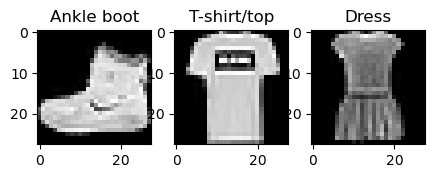

In [8]:
# Extract first 3 images of different types of clothing from the training dataset 
# by iterating over the data loader
examples = []
labels = []
for idx, (data, target) in enumerate(train_dataloader):
    for i in range(len(target)):
        # stop if already 3 examples selected
        if len(examples) >= 3:
            break
        # add a new example if one label is not already selected
        if target[i] not in labels:
            examples.append(data[i])
            labels.append(target[i])

# Print the size of the training images
for i in range(len(examples)):
    print(f"Image {i+1} size: {examples[i].size()}")

# Display the three images with their corresponding labels
fig, ax = plt.subplots(1, 3, figsize=(5, 5))
for i in range(len(examples)):
    ax[i].imshow(examples[i][0,:,:], cmap='gray')
    ax[i].set_title(class_names[labels[i]])
plt.show()

We note that the images are coded on a single channel. They are thus black and white. Moreover, they are composed of 28*28 pixels. This information will be useful later to create our neural network.

Now let's define our first neural network. We implement it with a depth of 3 layers and a width of 512 neurons in each hidden layer. 
The input layer is the nn.Flatten layer, which does not contribute to the depth or width of the network and transforms the input tensor into a 1D tensor.
The input of the network is 28*28*1 corresponding to the size of the images. The output is 10 corresponding to each of the possible labels.

In [5]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

import torch.nn.functional as F

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
       )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)

        return logits

model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [6]:
##Define a test function
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    #print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return correct, test_loss

In [7]:
##Define a train function
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()

    n_param = len(list(model.parameters()))
    mean_grads = []
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()

        for p in model.parameters():
          mean_grads.append(p.grad.abs().mean().item())

        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            #print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
    return mean_grads

**Q1.2 (2 point)** Let's now try to understand the learning_rate parameter. To do so, we will train our model 15 times and plot the accuracy and loss for each epoch. We then obtain the following results:

In [8]:
learning_rates = [1, 0.1, 1e-2, 1e-3]
epochs = 15

test_losses_rates = []
test_accuracies_rates = []

for lr in learning_rates:

    ###Define the loss function and optimizer
    model = NeuralNetwork().to(device)
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    test_losses = []
    test_accuracies = []

    for t in range(epochs):
        train(train_dataloader, model, loss_fn, optimizer)

        test_accuracy, test_loss = test(test_dataloader, model, loss_fn)
        test_losses.append(test_loss)
        test_accuracies.append(test_accuracy)

    test_losses_rates.append(test_losses)
    test_accuracies_rates.append(test_accuracies)

In [9]:
print(f"After 15 epochs\n---------------------------")
print(f"Lr    | Accuracy | Loss")
for i in range(len(learning_rates)):
  print(f"{learning_rates[i]:>0.3f} | {(100*test_accuracies_rates[i][-1]):>0.2f}%   | {test_losses_rates[i][-1]:>8f}")

After 15 epochs
---------------------------
Lr    | Accuracy | Loss
1.000 | 19.94%   | 1.711702
0.100 | 88.23%   | 0.329820
0.010 | 84.87%   | 0.425070
0.001 | 76.34%   | 0.676668


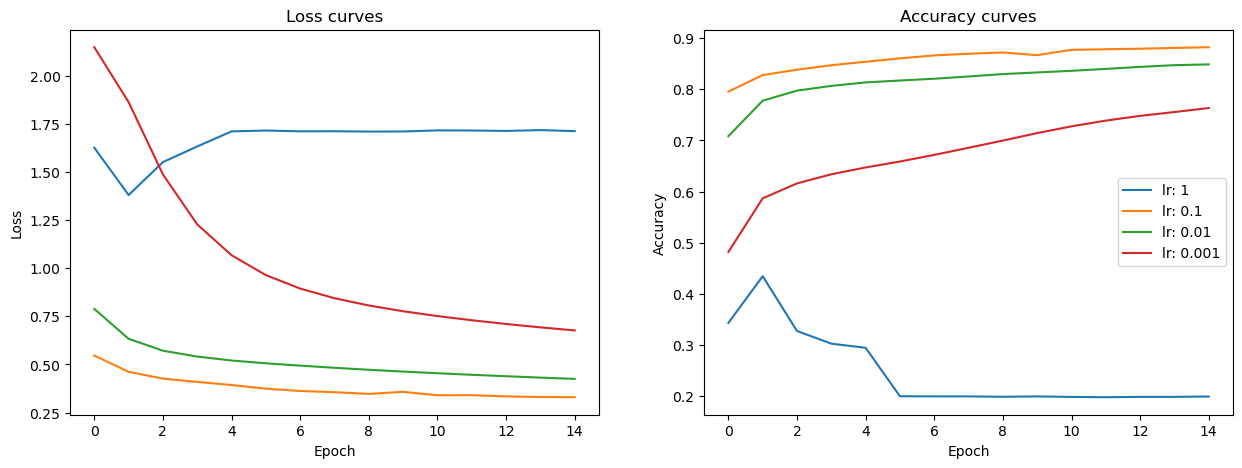

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
for i in range(len(learning_rates)):
    # plot loss curves for current experiment
    ax[0].plot(test_losses_rates[i], label=f"lr: {learning_rates[i]}")
    ax[1].plot(test_accuracies_rates[i], label=f"lr: {learning_rates[i]}")
ax[0].set_title(f"Loss curves")
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")
ax[1].set_title(f"Accuracy curves")
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Accuracy")
ax[1].legend()
plt.show()

With these results, it seems that the choice of the learning rate has a significant impact on the accuracy of the model and on its convergence. Indeed, we notice that for high learning rate (=1), the accuracy tends to diverge. On the other hand, for the others, the accuracy tends towards 100% more or less quickly. 


**Q1.3 (3 point)** Indeed, if we reach convergence when the difference of the accuracy at epoch n-1 and at epoch n is less than epsilon (=0.003), then we notice the following results:


In [11]:
print(f"Epoch for which the network training converges\n----------------------------------------------")
print(f"Lr    | Epochs | Accuracy | Loss")
epsilon = 0.003
for i in range(len(learning_rates)):
  epoch_conv = 0
  while (abs(test_accuracies_rates[i][epoch_conv]-test_accuracies_rates[i][epoch_conv+1])>epsilon and epoch_conv<(epochs-2)) :
    epoch_conv +=1
  print(f"{learning_rates[i]:>0.3f} | {epoch_conv:02d}     | {(100*test_accuracies_rates[i][epoch_conv]):>0.2f}%   | {test_losses_rates[i][epoch_conv]:>8f}")

Epoch for which the network training converges
----------------------------------------------
Lr    | Epochs | Accuracy | Loss
1.000 | 05     | 19.99%   | 1.714797
0.100 | 07     | 86.95%   | 0.355974
0.010 | 13     | 84.72%   | 0.431622
0.001 | 13     | 75.56%   | 0.692694


Therefore, except for the case lr=1 which diverges, the convergence is delayed when the learning rate decreases.

**Q1.4 (2 points)** To conclude, the learning rate appears to be a parameter that controls the optimizer's step size during gradient descent. A higher learning rate allows the optimizer to take larger steps and converge faster, but it can also cause it to diverge. On the contrary, a lower learning rate allows the optimizer to take smaller steps and converge more slowly, but also more smoothly.  
It is therefore important to choose a learning rate that balances these compromises and achieves good performance. Here, it seems that the best learning rate is 0.1


**Q1.5 (5 points)** Now let's try to understand the influence of the depth and width of the neural network. To do this, let's create three networks, a basic one, a deep one, and a wide one:  
- For the basic neural network, we keep the same network as before.  
- For the deep one, we add two layers of the same width as the others.  
- For the wide one, we keep the same depth and multiply the width by two

In [12]:
# Define Basic model
class BasicNeuralNetwork(nn.Module):
    def __init__(self):
        super(BasicNeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
       )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)

        return logits
model = BasicNeuralNetwork().to(device)
print(model)

BasicNeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [13]:
class DeeperNeuralNetwork(nn.Module):
    def __init__(self):
        super(DeeperNeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
       )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)

        return logits

model = DeeperNeuralNetwork().to(device)
print(model)

DeeperNeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=512, bias=True)
    (5): ReLU()
    (6): Linear(in_features=512, out_features=512, bias=True)
    (7): ReLU()
    (8): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [14]:
class WiderNeuralNetwork(nn.Module):
    def __init__(self):
        super(WiderNeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 1024),
            nn.ReLU(),
            nn.Linear(1024, 1024),
            nn.ReLU(),
            nn.Linear(1024, 10)
       )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)

        return logits
    
model = WiderNeuralNetwork().to(device)
print(model)

WiderNeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=1024, bias=True)
    (3): ReLU()
    (4): Linear(in_features=1024, out_features=10, bias=True)
  )
)


We train the three networks as before with a learning rate of 0.1 (best result obtained previously), and for 15 epochs. Here are the results obtained.

In [15]:
model_NN = [BasicNeuralNetwork(), DeeperNeuralNetwork(), WiderNeuralNetwork()]
test_losses_NN = []
test_accuracies_NN = []
epochs = 15
lr = 0.1
for i in range(len(model_NN)):
  model = model_NN[i].to(device)
  loss_fn = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  test_losses = []
  test_accuracies = []
  for t in range(epochs):
    train(train_dataloader, model, loss_fn, optimizer)
    test_accuracy, test_loss = test(test_dataloader, model, loss_fn)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
  test_losses_NN.append(test_losses)
  test_accuracies_NN.append(test_accuracies)

In [16]:
print(f"Structures | Accuracy | Loss     | Lr  | Parameters")
model = model_NN[0].to(device)
print(f"Base       | {(100*test_accuracies_NN[0][-1]):>0.2f}%   | {test_losses_NN[0][-1]:>8f} | {lr} | {sum(p.numel() for p in model.parameters() if p.requires_grad)}")
model = model_NN[1].to(device)
print(f"Deeper     | {(100*test_accuracies_NN[1][-1]):>0.2f}%   | {test_losses_NN[1][-1]:>8f} | {lr} | {sum(p.numel() for p in model.parameters() if p.requires_grad)}")
model = model_NN[2].to(device)	
print(f"Wider      | {(100*test_accuracies_NN[2][-1]):>0.2f}%   | {test_losses_NN[2][-1]:>8f} | {lr} | {sum(p.numel() for p in model.parameters() if p.requires_grad)}")		

Structures | Accuracy | Loss     | Lr  | Parameters
Base       | 88.21%   | 0.337871 | 0.1 | 669706
Deeper     | 87.23%   | 0.387034 | 0.1 | 1195018
Wider      | 87.58%   | 0.346808 | 0.1 | 1863690


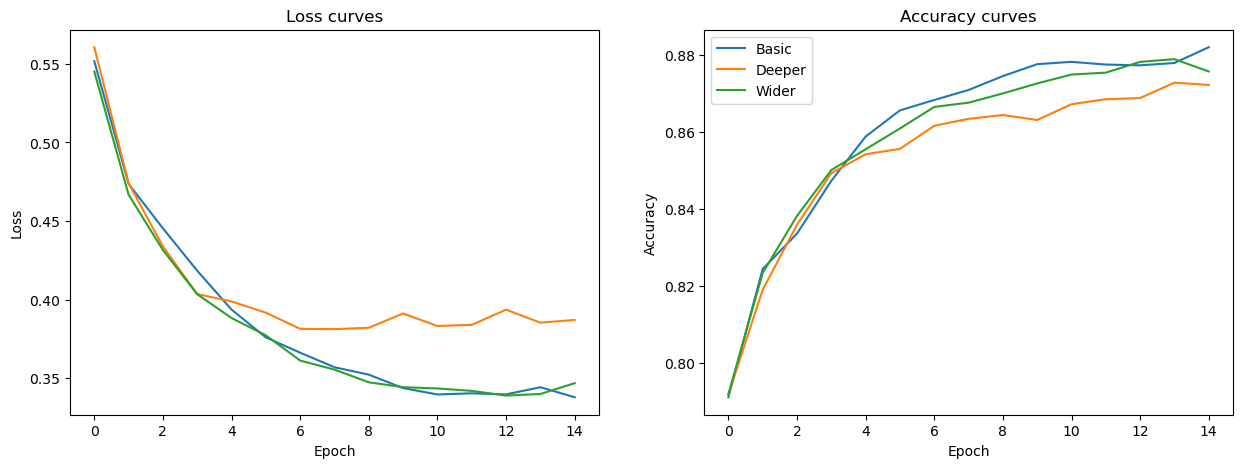

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
label = ["Basic", "Deeper", "Wider"]
for i in range(len(model_NN)):
    # plot loss curves for current experiment
    ax[0].plot(test_losses_NN[i], label=label[i])
    ax[1].plot(test_accuracies_NN[i], label=label[i])
ax[0].set_title(f"Loss curves")
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")
ax[1].set_title(f"Accuracy curves")
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Accuracy")
ax[1].legend()
plt.show()

We notice that the performances are quite similar although better. However, the number of parameters explode for deeper and wider networks compared to the basic one.   
Deeper networks are effective for identifying complex patterns while broader networks are effective in recognizing specific examples of the training set. However, both of these properties can lead to overfitting if the model is too complex for the task at hand (by adding two more layers of depth for example). In this case, we notice that the accuracy diverges. It is therefore important to balance the depth and width to avoid overfitting and to obtain a good accuracy.  
Here, it does not seem useful to make the network more complex because the performance is better with the basic network.

**Q1.6 (2 points)** Now, let's compute the average of the loss gradients for all trainable parameters. To do this, we will use the basic neural network with two learning rate values, 0;1 and 0.01. Here are the results obtained:


In [18]:
learning_rate = [0.1, 0.01]
list_grad_rate = []
for lr in learning_rate:
  model = NeuralNetwork().to(device)
  loss_fn = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  list_grad = []
  for i in range(10):
    grad = train(train_dataloader, model, loss_fn, optimizer)
    list_grad.append(np.mean(grad))
  list_grad_rate.append(list_grad)

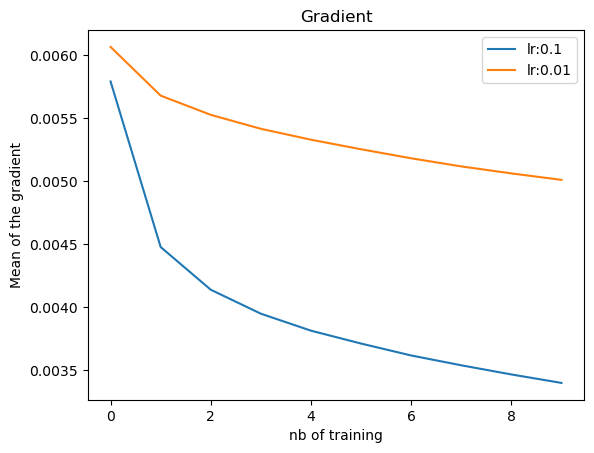

In [19]:
for i in range(len(learning_rate)):
    plt.plot(list_grad_rate[i], label=f"lr:{learning_rate[i]}")
plt.title(f"Gradient")
plt.xlabel("nb of training")
plt.ylabel("Mean of the gradient")
plt.legend()
plt.show()

The graph shows the gradient curve for both learning rates. We can observe that the gradients tend to be larger at the beginning of training and decrease as training progresses.  
The magnitude of the gradients is also affected by the learning rate: with higher learning rates leading to larger gradients. 
To choose the right learning rate value, we want the gradients to be large enough to allow the network to learn quickly without causing instability during learning.  
With the previous conclusions, it is found that the value 0.1 is a good value of learning rate which allows a fast and stable learning.

**Q1.7 (5 points)** To conclude, let us compare the performance between a small convolutional neural network instead of an MLP. To do this, we create a CNN consisting of two convolutional layers followed by a linear one. The first convolutional layer (self.conv1) supports an input image with a single 28*28 pixel channel. The last (linear) layer classifies the images.

In [31]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        self.pool = nn.MaxPool2d(2, 2)
        self.out = nn.Linear(12 * 4 * 4, 10)
        
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = self.out(x)
        return x
    
model = CNN().to(device)
print(model)

CNN(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (out): Linear(in_features=192, out_features=10, bias=True)
)


We perform the same test as before with the same parameters i.e. lr=0.1 and epochs=15. We obtain the following results:

In [28]:
test_losses_CNN = []
test_accuracies_CNN = []
epochs = 15
lr = 0.1
model = CNN().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
for t in range(epochs):
    train(train_dataloader, model, loss_fn, optimizer)
    test_accuracy, test_loss = test(test_dataloader, model, loss_fn)
    test_losses_CNN.append(test_loss)
    test_accuracies_CNN.append(test_accuracy)


In [29]:
print(f"Structures | Accuracy | Loss     | Lr  | Parameters")
model = model_NN[0].to(device)
print(f"MLP        | {(100*test_accuracies_NN[0][-1]):>0.2f}%   | {test_losses_NN[0][-1]:>8f} | {lr} | {sum(p.numel() for p in model.parameters() if p.requires_grad)}")
model = CNN().to(device)
print(f"CNN        | {(100*test_accuracies_CNN[-1]):>0.2f}%   | {test_losses_CNN[-1]:>8f} | {lr} | {sum(p.numel() for p in model.parameters() if p.requires_grad)}")		

Structures | Accuracy | Loss     | Lr  | Parameters
MLP        | 88.21%   | 0.337871 | 0.1 | 669706
CNN        | 87.51%   | 0.351876 | 0.1 | 3898


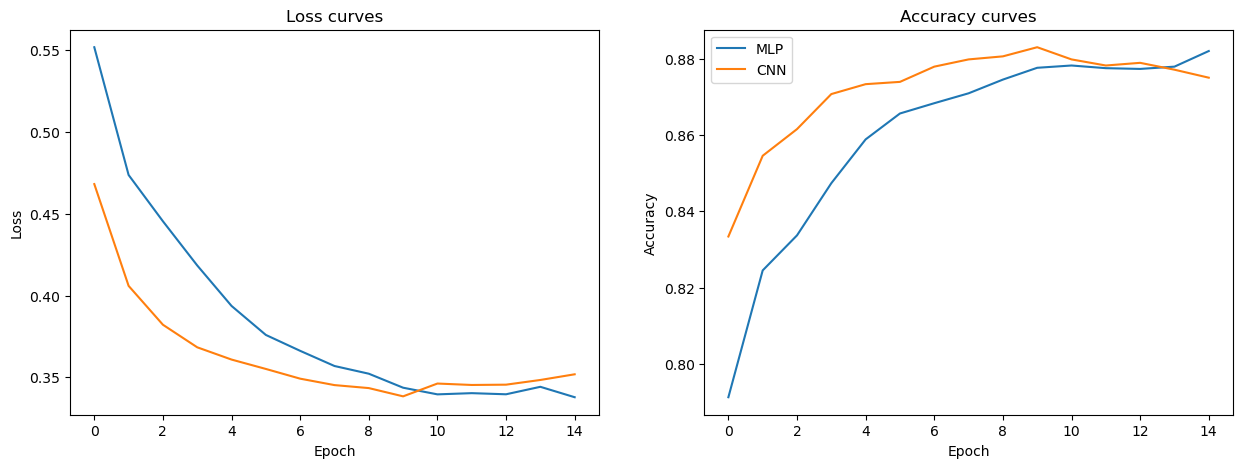

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
label = ["Base", "Deeper", "Wider"]

ax[0].plot(test_losses_NN[0], label="MLP")
ax[0].plot(test_losses_CNN, label="CNN")

ax[1].plot(test_accuracies_NN[0], label="MLP")
ax[1].plot(test_accuracies_CNN, label="CNN")

ax[0].set_title(f"Loss curves")
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")

ax[1].set_title(f"Accuracy curves")
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Accuracy")
ax[1].legend()
plt.show()

First, we notice that for the MLP network and the CNN, the accuracy is roughly the same for a very different number of parameters. Indeed, the CNN network uses only 3898 parameters to train while for the MLP there are 171 times more.   
Therefore, compared to multilayer perceptrons (MLP), which are fully connected networks, convolutional neural networks have fewer parameters and are better adapted to image data, where there is a strong spatial correlation between neighboring pixels.   
On the other hand, we notice that in terms of convergence, CNNs perform better than MLPs. 

## Conclusion

Convolutional neural networks (CNN) and multilayer perceptrons (MLP) are two types of neural network architectures.

MLPs are fully connected networks in which each neuron in one layer is connected to each neuron in the next layer. They are typically used for tasks such as classification on structured data, such as image pixels that have been flattened into a vector.

On the other hand, CNNs are designed to work with inputs that have an array topology, such as images. They use convolutional layers to extract local features from the input and pooling layers to reduce the spatial size of feature maps, followed by fully connected layers for classification. 

Compared to MLPs, CNNs have fewer parameters for high accuracy and fast convergence. 
However, the choice of structure to adopt should depend on the task to be performed.

On the other hand, it is not always necessary to complexify the network with a deeper or wider one because it can lead to overfitting.  
Finally, the learning rate is a crucial parameter to play on the stability and the speed of convergence of the model. To choose it, we have to make a compromise between these two factors.